# This project is to predict credit card churning using several Machine Learning Methods

In [2]:
# !pip install plotly
# !pip install xgboost
# !pip install lightgbm

## Import Libraries/Package 

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics, svm
import plotly
import os

## Load The Data 

####  The data was obtained from Kaggle: https://www.kaggle.com/sakshigoyal7/credit-card-customers


#### Column Name:
<ol> 
<li> CLIENTNUM = Client number. Unique identifier for the customer holding the account
    
<li> Attrition_Flag = Internal event (customer activity) variable - if the account is closed then 1 else 0 (THIS IS THE TARGET PARAMETER)
    
<li> Customer_Age
<li> Gender = Demographic variable - M=Male, F=Female
    
<li> Dependent_count = Demographic variable - Number of dependents
    
<li> Education_Level
    
<li> Marital_Status
<li> Income_Category = Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K-$80K, $80K-$120K, > $120K, Unknown)
<li> Card_Category = Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
<li> Months_on_book = Period of relationship with bank
<li> Total_Relationship_Count = Total no. of products held by the customer
<li> Months_Inactive_12_mon = No. of months inactive in the last 12 months

<li> Contacts_Count_12_mon = No. of Contacts in the last 12 months
<li> Credit_Limit
<li> Total_Revolving_Bal = Total Revolving Balance on the Credit Card
<li> Avg_Open_To_Buy = Open to Buy Credit Line (Average of last 12 months)
<li> Total_Amt_Chng_Q4_Q1 = Change in Transaction Amount (Q4 over Q1)
<li> Total_Trans_Amt = Total Transaction Amount (Last 12 months)
<li> Total_Trans_Ct = Total Transaction Count (Last 12 months)
<li> Total_Ct_Chng_Q4_Q1 = Change in Transaction Count (Q4 over Q1)
<li> Avg_Utilization_Ratio = Average Card Utilization Ratio

</ol>

In [4]:
df = pd.read_csv('ChurnData.csv')
df.to_csv(index=False)
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998


In [5]:
df.drop(columns=df.columns[-2:], inplace=True)
df.drop('CLIENTNUM',axis=1,inplace=True)

In [6]:
len(df.columns)

20

# Important function for plotting and evaluation

## Function to plot confusion matrix

In [7]:
def conf_matrix(classifier, Title):
    cf = metrics.confusion_matrix(y_test_scaled, classifier.predict(X_test_scaled), labels=[1,0])
    x_axis_labels=['Attrited','Existing']
    y_axis_labels=['Attrited','Existing']

    ax = plt.axes()
    sns.heatmap(cf, ax = ax,annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title(Title, fontsize = 15)
    ax.set_xlabel('Predicted', fontsize = 15)
    ax.set_ylabel('Actual', fontsize = 15)
    plt.show()


In [8]:
def class_report(classifier):
    print(metrics.classification_report(y_test_scaled,classifier.predict(X_test_scaled), labels=[1,0]))
    print('Accuracy_Score:',accuracy_score(y_test_scaled,classifier.predict(X_test_scaled))*100,'%')
    print('Recall:',metrics.recall_score(y_test_scaled,classifier.predict(X_test_scaled))*100,'%')

In [9]:
def class_report_val(classifier):
    print(metrics.classification_report(y_val_scaled,classifier.predict(X_val_scaled), labels=[1,0]))
    print('Accuracy_Score:',accuracy_score(y_val_scaled,classifier.predict(X_val_scaled))*100,'%')
    print('Recall:',metrics.recall_score(y_val_scaled,classifier.predict(X_val_scaled))*100,'%')

# Import data from the ETL

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, shuffle=True)

In [11]:
from numpy import asarray
from numpy import save
from numpy import load

In [12]:
# Non-scaked data
X_train = load('X_train.npy')
X_test = load('X_test.npy')
y_train = load('y_train.npy')
y_test = load('y_test.npy')
X_val = load('X_val.npy')
y_val = load('y_val.npy')


#Scaled for the Neural Network
X_train_scaled = load('X_train_scaled.npy')
X_test_scaled = load('X_test_scaled.npy')
y_train_scaled = load('y_train_scaled.npy')
y_test_scaled = load('y_test_scaled.npy')
X_val_scaled = load('X_val_scaled.npy')
y_val_scaled = load('y_val_scaled.npy')

# Trying Machine Learning Classifier 

## 1. Random Forest Classifier 

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
rf=RandomForestClassifier()

In [15]:
rf.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier()

### Validation

Coss Validation scores:
1 .  0.91005291005291
2 .  0.9402173913043478
3 .  0.9597701149425287
4 .  0.8972972972972973
5 .  0.9314285714285714
-------------------------------------------------------

average 0.927753257005131 



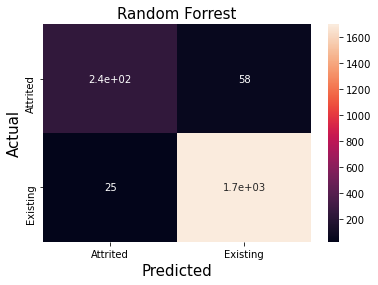

-------------------------------------------------------
class_report
              precision    recall  f1-score   support

           1       0.91      0.81      0.85       301
           0       0.97      0.99      0.98      1725

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

Accuracy_Score: 95.90325765054294 %
Recall: 80.73089700996677 %
-------------------------------------------------------

class_report_val
              precision    recall  f1-score   support

           1       0.95      0.82      0.88       279
           0       0.96      0.99      0.98      1342

    accuracy                           0.96      1621
   macro avg       0.96      0.91      0.93      1621
weighted avg       0.96      0.96      0.96      1621

Accuracy_Score: 96.11351017890192 %
Recall: 82.07885304659499 %


In [16]:
scoresrf = cross_val_score(rf, X_train_scaled, y_train_scaled, cv = 5, scoring='precision')

print("Coss Validation scores:")
for i in range(len(scoresrf)):
    print(i+1, ". ", scoresrf[i])
print("-------------------------------------------------------")
print("\naverage", np.mean(scoresrf),"\n")

conf_matrix(rf, 'Random Forrest')

print("-------------------------------------------------------")
print("class_report")
class_report(rf)
print("-------------------------------------------------------")
print("\nclass_report_val")
class_report_val(rf)

## 2. Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline

##### StandardScaler is not used because not all data are normally distributed,

In [18]:
pipe = make_pipeline(MinMaxScaler(),LogisticRegression())

In [19]:
lr = pipe.fit(X_train_scaled, y_train_scaled)
lr

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

### Validation

Coss Validation scores:
1 .  0.8102189781021898
2 .  0.8283582089552238
3 .  0.768
4 .  0.7534246575342466
5 .  0.7681159420289855
-------------------------------------------------------

average 0.785623557324129 



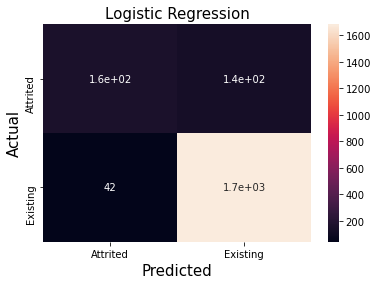

-------------------------------------------------------
class_report
              precision    recall  f1-score   support

           1       0.80      0.54      0.64       301
           0       0.92      0.98      0.95      1725

    accuracy                           0.91      2026
   macro avg       0.86      0.76      0.80      2026
weighted avg       0.91      0.91      0.90      2026

Accuracy_Score: 91.11549851924975 %
Recall: 54.15282392026578 %
-------------------------------------------------------

class_report_val
              precision    recall  f1-score   support

           1       0.81      0.52      0.63       279
           0       0.91      0.97      0.94      1342

    accuracy                           0.90      1621
   macro avg       0.86      0.75      0.79      1621
weighted avg       0.89      0.90      0.89      1621

Accuracy_Score: 89.63602714373843 %
Recall: 51.971326164874554 %


In [20]:
scoreslr = cross_val_score(lr, X_train_scaled, y_train_scaled, cv = 5, scoring='precision')

print("Coss Validation scores:")
for i in range(len(scoreslr)):
    print(i+1, ". ", scoreslr[i])
print("-------------------------------------------------------")
print("\naverage", np.mean(scoreslr),"\n")

conf_matrix(lr, 'Logistic Regression')

print("-------------------------------------------------------")
print("class_report")
class_report(lr)
print("-------------------------------------------------------")
print("\nclass_report_val")
class_report_val(lr)

## 3. Try XGBoostClassifier

### X-Gradient-Boost Classifier 

In [21]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train_scaled)

[09:23:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Validation

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:23:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:23:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:23:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:23:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

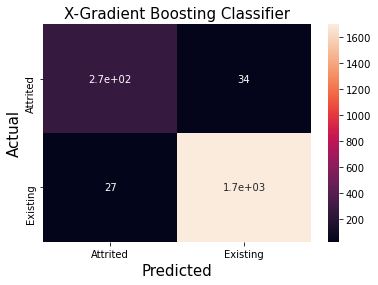

-------------------------------------------------------
class_report
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       301
           0       0.98      0.98      0.98      1725

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 96.98914116485686 %
Recall: 88.70431893687709 %
-------------------------------------------------------

class_report_val
              precision    recall  f1-score   support

           1       0.94      0.91      0.93       279
           0       0.98      0.99      0.98      1342

    accuracy                           0.97      1621
   macro avg       0.96      0.95      0.96      1621
weighted avg       0.97      0.97      0.97      1621

Accuracy_Score: 97.47069710055521 %
Recall: 91.0394265232975 %


In [22]:
scoresxgb = cross_val_score(xgb, X_train_scaled, y_train_scaled, cv = 5, scoring='precision')

print("Coss Validation scores:")
for i in range(len(scoresxgb)):
    print(i+1, ". ", scoresxgb[i])
print("-------------------------------------------------------")
print("\naverage", np.mean(scoresxgb),"\n")

conf_matrix(xgb, 'X-Gradient Boosting Classifier')

print("-------------------------------------------------------")
print("class_report")
class_report(xgb)
print("-------------------------------------------------------")
print("\nclass_report_val")
class_report_val(xgb)

## 4. LGBM Classifier

### Light Gradient Boosting Machine

In [23]:
lgbm=LGBMClassifier()

In [24]:
lgbm.fit(X_train_scaled, y_train_scaled)

LGBMClassifier()

### Validation 

Coss Validation scores:
1 .  0.9054726368159204
2 .  0.9191919191919192
3 .  0.9775280898876404
4 .  0.9547738693467337
5 .  0.925
-------------------------------------------------------

average 0.9363933030484427 



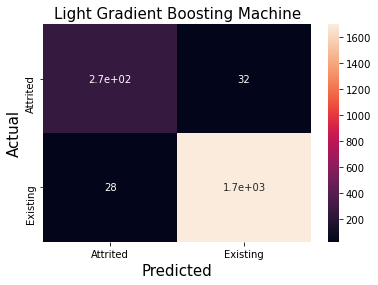

-------------------------------------------------------
class_report
              precision    recall  f1-score   support

           1       0.91      0.89      0.90       301
           0       0.98      0.98      0.98      1725

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy_Score: 97.03849950641658 %
Recall: 89.3687707641196 %
-------------------------------------------------------

class_report_val
              precision    recall  f1-score   support

           1       0.94      0.92      0.93       279
           0       0.98      0.99      0.99      1342

    accuracy                           0.98      1621
   macro avg       0.96      0.95      0.96      1621
weighted avg       0.98      0.98      0.98      1621

Accuracy_Score: 97.59407772979642 %
Recall: 92.1146953405018 %


In [25]:
scoreslgbm = cross_val_score(lgbm, X_train_scaled, y_train_scaled, cv = 5, scoring='precision')

print("Coss Validation scores:")
for i in range(len(scoreslgbm)):
    print(i+1, ". ", scoreslgbm[i])
print("-------------------------------------------------------")
print("\naverage", np.mean(scoreslgbm),"\n")

conf_matrix(lgbm, 'Light Gradient Boosting Machine')

print("-------------------------------------------------------")
print("class_report")
class_report(lgbm)
print("-------------------------------------------------------")
print("\nclass_report_val")
class_report_val(lgbm)

# Trying to use Neural Network

## Lets import necessary Libraries and Packages 

In [37]:
# !pip install keras

In [38]:
# !pip install tensorflow==2.2

In [40]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.preprocessing import MinMaxScaler

In [41]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

In [42]:
print(X_train_scaled.shape, 'and', X_test_scaled.shape)

(6480, 19) and (2026, 19)


In [43]:
print(y_train.shape, 'and', y_test.shape)

(6480,) and (2026,)


## Model 1  -- Longer

In [44]:
model1 = Sequential()
model1.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), input_dim=19, activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.2))
model1.add(Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model1.add(Dropout(rate=0.1))
model1.add(Dense(1, activation='sigmoid'))

In [45]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

In [56]:
model1.compile(loss = "binary_crossentropy", 
                  optimizer = 'adam', 
                  metrics=['accuracy'])
    

history1 = model1.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=150, batch_size=32, verbose=0)

score1 = model1.evaluate(X_test_scaled, y_test_scaled, verbose=0)

### Save the history 

In [57]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_1 = history1.history
# Save it under the form of a json file
json.dump(history_1, open('history1.json', 'w'))

### Load the history for later use 

In [59]:
history_1 = json.load(open('history1.json', 'r'))

### Plot the figure 

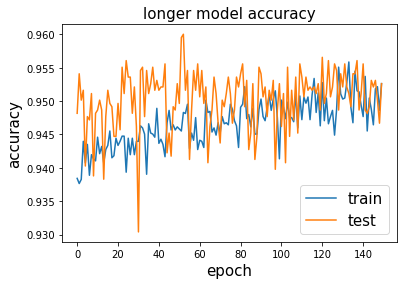

In [69]:
plt.plot(history_1['accuracy']) 
plt.plot(history_1['val_accuracy']) 
plt.title('longer model accuracy', fontsize = 15) 
plt.ylabel('accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15) 
plt.legend(['train', 'test'], loc='lower right', fontsize = 15) 
plt.show()

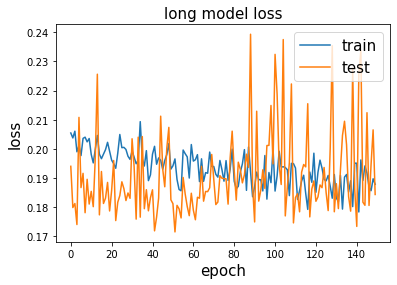

In [70]:
plt.plot(history_1['loss']) 
plt.plot(history_1['val_loss']) 
plt.title('long model loss', fontsize = 15) 
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right', fontsize = 15)
plt.show()

In [79]:
# Evaluation:
yprednn1=model1.predict(X_test_scaled)
yprednn1=yprednn1.round()

In [47]:
print('Longer Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn1, y_test_scaled)))
nn_conf_matrix1=metrics.confusion_matrix(yprednn1,y_test_scaled)
conf_mat_nn1 = pd.DataFrame(nn_conf_matrix1, 
    columns=["Predicted Existing", "Predicted Attrited"], 
    index=["Actual Existing", "Actual Attrited"])
print(conf_mat_nn1)

# conf_matrix(model1, "Light Gradient Boosting Machine")

Longer Neural Network:
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96      1827
         1.0       0.62      0.94      0.75       199

    accuracy                           0.94      2026
   macro avg       0.81      0.94      0.86      2026
weighted avg       0.96      0.94      0.94      2026


                 Predicted Existing  Predicted Attrited
Actual Existing                1713                 114
Actual Attrited                  12                 187


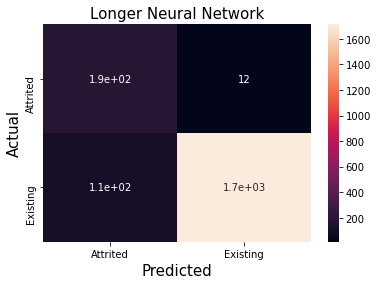

In [76]:
cf1 = metrics.confusion_matrix(yprednn1, y_test, labels=[1,0])
x_axis_labels=['Attrited','Existing']
y_axis_labels=['Attrited','Existing']

ax = plt.axes()
sns.heatmap(cf1, ax = ax,annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Longer Neural Network', fontsize = 15)
ax.set_xlabel('Predicted', fontsize = 15)
ax.set_ylabel('Actual', fontsize = 15)
plt.show()

### Save and load the model 

In [27]:
from keras.models import model_from_json

Using TensorFlow backend.


In [82]:
# serialize model to JSON
model1_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
    
# serialize weights to HDF5
model1.save_weights("model1.h5")
print("Saved model1 to disk")

Saved model1 to disk
Loaded model1 from disk


In [28]:
# load json and create model
json1_file = open('model1.json', 'r')
nn_model1_json = json1_file.read()
json1_file.close()
nn_model1 = model_from_json(nn_model1_json)
# load weights into new model
nn_model1.load_weights("model1.h5")
print("Loaded model1 from disk")

Loaded model1 from disk


## model 2 -- wider

In [61]:
model2 = Sequential()
model2.add(Dense(1024, kernel_regularizer=regularizers.l2(0.001), input_dim=19, activation='relu'))
model2.add(Dropout(rate=0.2))
model2.add(Dense(2048, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(Dropout(rate=0.1))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              20480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2049      
Total params: 2,121,729
Trainable params: 2,121,729
Non-trainable params: 0
_________________________________________________________________


In [62]:
model2.compile(loss = "binary_crossentropy", 
                  optimizer = 'adam', 
                  metrics=['accuracy'])
    

history2 = model2.fit(X_train_scaled, y_train_scaled, validation_data=(X_val_scaled, y_val_scaled), epochs=150, batch_size=32, verbose=0)
# history
score2 = model2.evaluate(X_test_scaled, y_test_scaled, verbose=0)

### Save the history model 2

In [65]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_2 = history2.history
# Save it under the form of a json file
json.dump(history_2, open('history2.json', 'w'))

### Load the history2

In [66]:
history_2 = json.load(open('history2.json', 'r'))

### Plot the Figure

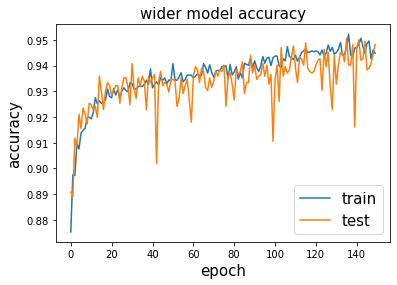

In [67]:
plt.plot(history_2['accuracy']) 
plt.plot(history_2['val_accuracy']) 
plt.title('wider model accuracy', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
plt.xlabel('epoch', fontsize = 15) 
plt.legend(['train', 'test'], loc='lower right', fontsize = 15) 
plt.show()

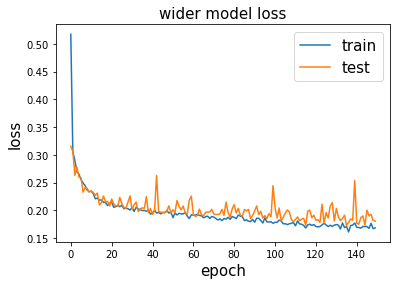

In [68]:
plt.plot(history_2['loss']) 
plt.plot(history_2['val_loss']) 
plt.title('wider model loss', fontsize = 15) 
plt.ylabel('loss', fontsize = 15)
plt.xlabel('epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right', fontsize = 15)
plt.show()

In [78]:
# Evaluation:
yprednn2=model2.predict(X_test_scaled)
yprednn2=yprednn2.round()

In [56]:
print('Wider Neural Network:\n {}\n'.format(
    metrics.classification_report(yprednn2, y_test_scaled)))

nn_conf_matrix2=metrics.confusion_matrix(yprednn2,y_test_scaled)
conf_mat_nn2 = pd.DataFrame(nn_conf_matrix2, 
    columns=["Predicted Existing", "Predicted Attrited"], 
    index=["Actual Existing", "Actual Attrited"])
print(conf_mat_nn2)

# conf_matrix(model1, "Light Gradient Boosting Machine")

Wider Neural Network:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1618
         1.0       0.91      0.67      0.77       408

    accuracy                           0.92      2026
   macro avg       0.92      0.83      0.86      2026
weighted avg       0.92      0.92      0.92      2026


                 Predicted Existing  Predicted Attrited
Actual Existing                1591                  27
Actual Attrited                 134                 274


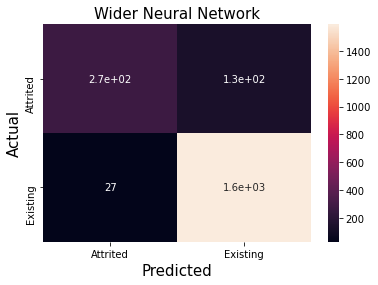

In [78]:
cf2 = metrics.confusion_matrix(yprednn2, y_test_scaled, labels=[1,0])
x_axis_labels=['Attrited','Existing']
y_axis_labels=['Attrited','Existing']

ax = plt.axes()
sns.heatmap(cf2, ax = ax,annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Wider Neural Network', fontsize = 15)
ax.set_xlabel('Predicted', fontsize = 15)
ax.set_ylabel('Actual', fontsize = 15)
plt.show()

### Save the model 

In [71]:
# serialize model to JSON
model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
    
# serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model2 to disk")

Saved model2 to disk


### Load the model 

In [72]:

# load json and create model
json2_file = open('model2.json', 'r')
nn_model2_json = json2_file.read()
json2_file.close()
nn_model2 = model_from_json(nn_model2_json)
# load weights into new model
nn_model2.load_weights("model2.h5")
print("Loaded model2from disk")

Loaded model2from disk


# What feature is the most affecting churn?

According to Random Forest classifier

In [73]:
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
df_churn = pd.read_csv('df_churn.csv')

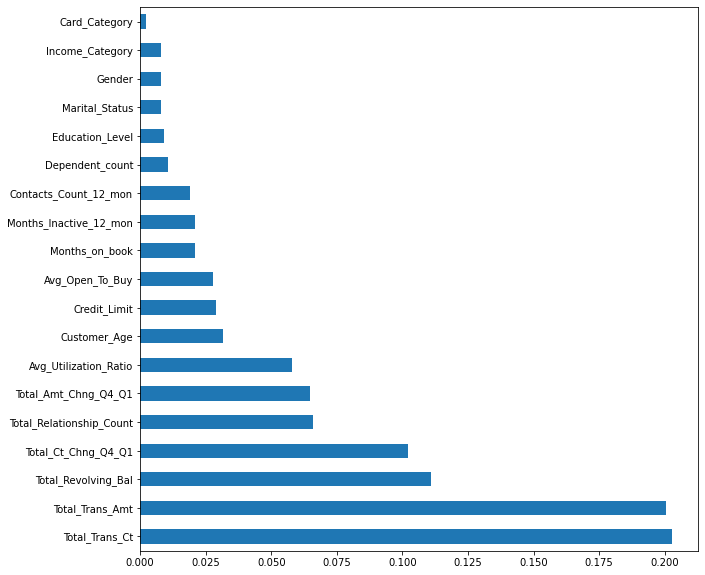

In [75]:
rf =  ensemble.RandomForestClassifier(n_estimators=130,max_features=6, n_jobs=-1)
rf.fit(X_train_scaled, y_train_scaled)
feature_importance = rf.feature_importances_
feat_importances = pd.Series(rf.feature_importances_, index=df_churn.iloc[:,1:].columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))

plt.show()

# Summary: What model is best?

In [76]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [80]:
model_name = ['Random Forest','Logistic Regression', 'XGBoost', 'LGBM', 'Longer Neural Network', 'Wider Neural Network']
accuracy = []
f1 = []
recall = []

model_code = [rf, lr, xgb, lgbm, nn_model1, nn_model2]

for i in model_code:
    if i == nn_model1:
        accuracy.append(round(history1.history['val_accuracy'][149]*100,2))
        f1.append(round(metrics.f1_score(y_test_scaled, yprednn1)*100,2))
        recall.append(round(metrics.recall_score(y_test_scaled, yprednn1)*100,2))
    elif i == nn_model2:
        accuracy.append(round(history2.history['val_accuracy'][149]*100,2))
        f1.append(round(metrics.f1_score(y_test_scaled, yprednn2)*100,2))
        recall.append(round(metrics.recall_score(y_test_scaled, yprednn2)*100,2))
    else:
        accuracy.append(round(accuracy_score(y_test_scaled, i.predict(X_test_scaled))*100,2))
        f1.append(round(metrics.f1_score(y_test_scaled, i.predict(X_test_scaled))*100,2))
        recall.append(round(metrics.recall_score(y_test_scaled, i.predict(X_test_scaled))*100,2))
    

summary = pd.DataFrame({'Model': model_name, 'Accuracy': accuracy, 'f1 Score': f1, 'Recall': recall})

summary.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,f1 Score,Recall
3,LGBM,97.04,89.97,89.37
2,XGBoost,96.99,89.75,88.70
0,Random Forest,96.35,87.29,84.39
4,Longer Neural Network,95.26,84.16,84.72
5,Wider Neural Network,94.82,81.41,80.73
1,Logistic Regression,91.12,64.43,54.15


In [81]:
print("The best Model for this churn is:", 
    summary[summary["Accuracy"] == summary["Accuracy"].max()]["Model"].values[0], "\n\tand the worst is:",
    summary[summary["Accuracy"] == summary["Accuracy"].min()]["Model"].values[0])

The best Model for this churn is: LGBM 
	and the worst is: Logistic Regression


In [83]:
summary.to_csv('summary.csv', index=False)